###### Veri Analizi Yapacağız ve bir regresyon problemini çözeceğiz.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [132]:
dataFrame=pd.read_excel("merc.xlsx")

In [133]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [134]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [135]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

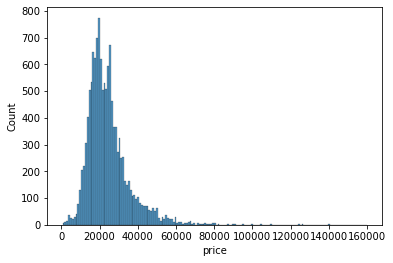

In [136]:
sbn.histplot(dataFrame["price"])

grafikten anlaşıldığı üzere çok pahalı olan az miktarda araba var bu bizim tahminlerimizi kötü etkileyecektir. Bunu iyileştirmenin bir yolu da en pahalı olan arabaların bazılarını veri setimizden çıkarmak

<AxesSubplot:xlabel='year', ylabel='count'>

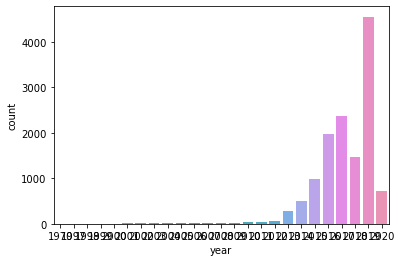

In [137]:
sbn.countplot(x="year",data=dataFrame)

In [138]:
#verilerin birbirleri arasındaki korelasyonuna bakalım
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [139]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

Buradan şunu çıkarabiliz mileage ve mpg arttıkça price azalıyor diğerlerinde artıyor artışı en fazla etkileyen de year 

<AxesSubplot:xlabel='mileage', ylabel='price'>

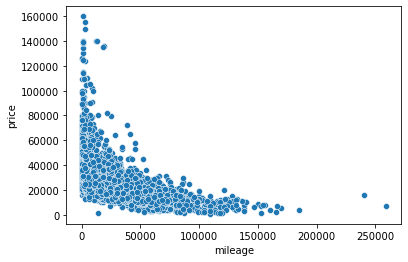

In [140]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [141]:
dataFrame.sort_values("price",ascending=False).head(20)
#en yüksek fiyat en yukarda 

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [142]:
len(dataFrame)

13119

In [143]:
len(dataFrame)*0.01

131.19

en yüksek fiyatlı olan 131 arabayı çıkartmayı deneyelim

In [144]:
yuzdeDoksanDokuzDf=dataFrame.sort_values("price",ascending=False).iloc[131:]

In [145]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 504x360 with 0 Axes>

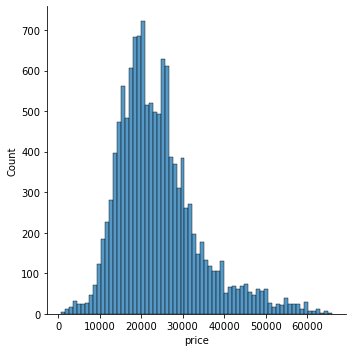

In [146]:
plt.figure(figsize=(7,5))
sbn.displot(yuzdeDoksanDokuzDf["price"])

In [147]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [148]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

İstediğimiz bir yılı dataFrame'imizden atmak istediğimizi varsayalım:

In [149]:
dataFrame=yuzdeDoksanDokuzDf #dataFrameimizin %1'inin atıldığı haliyle çalışalım artık

In [150]:
dataFrame=dataFrame[dataFrame.year != 1970] #1970 yıllarını da atıyoruz dataFrame'imizden

In [151]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

dataFrameimizde transmission adından bir sütun var değerleri numerik olmadığı için regresyona sokarsak hata verir o yüzden silelim

In [152]:
dataFrame=dataFrame.drop("transmission",axis=1) #axis=1 column'u ifade eder

### Artık regresyona girmeye hazırız

In [153]:
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values

In [154]:
from sklearn.model_selection import train_test_split
#dizilerimizi eğiteceğimiz ve test yapacağımız dizilere bölmemize yardımcı oluyor.

In [155]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)
#random_state'i rastgele verebiliriz ancak aynı rastgele verileri tekrar almak istiyorsan aynı değeri kullanmalısın

In [156]:
len(x_train)

9090

In [157]:
len(x_test)

3897

Scaling işlemimizi yapalım:

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler=MinMaxScaler()

In [160]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
#ulaşmak istediğimiz değeri scale etmemize gereke yok

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#dense layer: bütun bu nöronların outputların birbirine bağlı olduğu bir katman çeşidi

In [162]:
x_train.shape

(9090, 5)

In [163]:
model=Sequential()

#12: nöron sayımız
model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(14,activation="relu"))
#4 adet katman ekledik modelimize

#son olarak çıkış katmanımızı ekleyelim
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

Gelelim artık modeli eğitmeye..

In [164]:
#datayı modele bi anda vermek modelimizi yoracaktır bachler halinde vermeliyiz
#batch_size'ı çok düşük verirsen yapması çok uzun sürebilir
#epocs'u çok düşük veya yüksek vermek modelimizin işleyişini bozabilir
#modeli eğitirken validate edebiliyoruz.

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250,epochs=300) 


Epoch 1/300
37/37 [==============================] - 0s 5ms/step - loss: 672140800.0000 - val_loss: 688095616.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672111552.0000 - val_loss: 688045248.0000
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 672016448.0000 - val_loss: 687865024.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671654208.0000 - val_loss: 687187712.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 670468736.0000 - val_loss: 685171264.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 667194112.0000 - val_loss: 679922048.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 659417024.0000 - val_loss: 668360832.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 643580608.0000 - val_loss: 646330304.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 6150839

37/37 [==============================] - 0s 4ms/step - loss: 57957612.0000 - val_loss: 55855000.0000
Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 57278276.0000 - val_loss: 55044020.0000
Epoch 74/300
37/37 [==============================] - 0s 4ms/step - loss: 56571856.0000 - val_loss: 54381936.0000
Epoch 75/300
37/37 [==============================] - 0s 3ms/step - loss: 55857848.0000 - val_loss: 53486224.0000
Epoch 76/300
37/37 [==============================] - 0s 3ms/step - loss: 55157940.0000 - val_loss: 52720080.0000
Epoch 77/300
37/37 [==============================] - 0s 3ms/step - loss: 54403580.0000 - val_loss: 52122248.0000
Epoch 78/300
37/37 [==============================] - 0s 3ms/step - loss: 53665172.0000 - val_loss: 51183816.0000
Epoch 79/300
37/37 [==============================] - 0s 3ms/step - loss: 52904652.0000 - val_loss: 50446700.0000
Epoch 80/300
37/37 [==============================] - 0s 3ms/step - loss: 52144720.0000 - val_loss: 4

37/37 [==============================] - 0s 4ms/step - loss: 22396994.0000 - val_loss: 27379132.0000
Epoch 144/300
37/37 [==============================] - 0s 4ms/step - loss: 22385388.0000 - val_loss: 26077876.0000
Epoch 145/300
37/37 [==============================] - 0s 4ms/step - loss: 22291464.0000 - val_loss: 26063270.0000
Epoch 146/300
37/37 [==============================] - 0s 4ms/step - loss: 22219650.0000 - val_loss: 26259742.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 22150916.0000 - val_loss: 26133126.0000
Epoch 148/300
37/37 [==============================] - 0s 2ms/step - loss: 22065080.0000 - val_loss: 26519622.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 22038160.0000 - val_loss: 26722924.0000
Epoch 150/300
37/37 [==============================] - 0s 2ms/step - loss: 21995410.0000 - val_loss: 26434842.0000
Epoch 151/300
37/37 [==============================] - 0s 2ms/step - loss: 21900684.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 19790868.0000 - val_loss: 23856504.0000
Epoch 215/300
37/37 [==============================] - 0s 4ms/step - loss: 19778536.0000 - val_loss: 24073898.0000
Epoch 216/300
37/37 [==============================] - 0s 3ms/step - loss: 19769852.0000 - val_loss: 23654928.0000
Epoch 217/300
37/37 [==============================] - 0s 3ms/step - loss: 19730286.0000 - val_loss: 23875114.0000
Epoch 218/300
37/37 [==============================] - 0s 3ms/step - loss: 19736288.0000 - val_loss: 24059258.0000
Epoch 219/300
37/37 [==============================] - 0s 2ms/step - loss: 19721204.0000 - val_loss: 24373880.0000
Epoch 220/300
37/37 [==============================] - 0s 2ms/step - loss: 19711274.0000 - val_loss: 23615686.0000
Epoch 221/300
37/37 [==============================] - 0s 2ms/step - loss: 19664954.0000 - val_loss: 23473768.0000
Epoch 222/300
37/37 [==============================] - 0s 2ms/step - loss: 19651386.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 18866530.0000 - val_loss: 22491842.0000
Epoch 286/300
37/37 [==============================] - 0s 5ms/step - loss: 18847806.0000 - val_loss: 22373906.0000
Epoch 287/300
37/37 [==============================] - 0s 5ms/step - loss: 18843208.0000 - val_loss: 22569466.0000
Epoch 288/300
37/37 [==============================] - 0s 5ms/step - loss: 18840114.0000 - val_loss: 22815350.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 18832644.0000 - val_loss: 22850086.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 18831542.0000 - val_loss: 22920038.0000
Epoch 291/300
37/37 [==============================] - 0s 5ms/step - loss: 18812466.0000 - val_loss: 22768852.0000
Epoch 292/300
37/37 [==============================] - 0s 5ms/step - loss: 18798946.0000 - val_loss: 23124744.0000
Epoch 293/300
37/37 [==============================] - 0s 5ms/step - loss: 18802630.0000 - val

In [165]:
kayipVerisi=pd.DataFrame(model.history.history)

In [166]:
kayipVerisi.head()

,loss,val_loss
0,672140800.0,688095616.0
1,672111552.0,688045248.0
2,672016448.0,687865024.0
3,671654208.0,687187712.0
4,670468736.0,685171264.0


<AxesSubplot:>

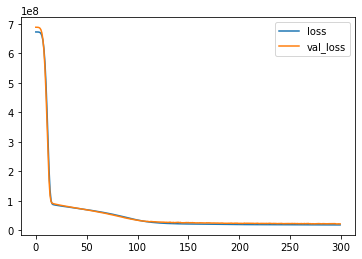

In [167]:
kayipVerisi.plot()

- Bakmamız gereken ilk şey azalıyor mu? 
- loss ve val_los birlikte hareket ediyor mu? özellikle sonlara doğru
** eğer belirli bir yerden sonra loss ve val_loss birbirinden ayrılıyorsa overfitting yapıyor olabiliriz epocs'u azaltmayı deneyebiliriz

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [169]:
tahminDizisi=model.predict(x_test)

In [170]:
mean_absolute_error(y_test,tahminDizisi)

3332.5694724795817

3332 lık bir fark var. Yani gerçek fiyattan bu kadar sapabiliriz demek oluyor. 

In [171]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


3332/24074=0.13... %13lük bir fark var

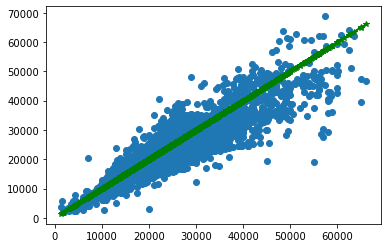

In [172]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

Hemen hemen düzgün bir lineer regresyon bulmuşuz gibi gözüküyor ama sapmalar da mevcut. DataFrame'imizde varolan bir fiyat üzerinde deneme yapalım:

In [174]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [175]:
yeniArabaSeries=dataFrame.drop("price",axis=1).iloc[2]

In [176]:
type(yeniArabaSeries)

pandas.core.series.Series

In [177]:
yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [178]:
model.predict(yeniArabaSeries)

array([[62474.957]], dtype=float32)

normalde 65980di bizim eğittiğimiz modelde 62474 çıktı